# CS2250 Computability and Complexity
## 2024 Spring


Starter code and examples by Clayton Cafiero <cbcafier@uvm.edu>, 2024-01-15.

Notice that we deviate from PEP 8 to get closer to Sipser's notation.

### DFA class
Your assignment is to define and test a DFA class, which, upon receiving the definition of a DFA (as passed to its constructor), instantiates a new DFA, that can then be used to decide whether strings are in its language or not.

Once you have your DFA class defined, you'll define, instantiate, and test two DFAs. Two other DFAs are provided by way of example.

#### Defining the class
The class should be named "Dfa". The class should implement two methods: a constructor, `__init__()`, and a method to decide a given input string. 

##### The `__init__()` method

If you haven't done OOP in Python before, `__init__()` is the name of the default constructor for a class. The arguments to the constructor should be (in this order):

- a set representing the states of the DFA,
- the alphabet (also a set),
- the transition function, represented with a dictionary,
- the start state, and
- the set of accept states.

State labels and alphabet symbols should be strings.

The constructor should raise an exception on any invalid or ill-formed input (hint: use `assert`, `isinstance()`, and `all()` as appropriate; a few lines are given to you to get you started.

Python `__init__()` constructors do not require a return (this is implicit).

##### The `recognize()` method

The other method should be called `recognize()` and it should take a single argument, a string. This should return a Boolean: `True` if the string is in the language of the machine and `False` otherwise. That's it!

This class definition needn't be long, but it should be readable. My solution has 28 lines of code, most of which is just validating inputs before instantiating a DFA---the code that recognizes (or rejects) a given input string is only _five lines long_. These are simple machines!
 
These metrics are given not as hard and fast expectations for your code, but are to indicate that _your solution needn't be long_. Keep it straightforward and concise, but don't play any code golf --- this isn't a contest, and _clarity is important_.

### COMPLETE THE CLASS DEFINITION and `recognize` METHOD BELOW

In [4]:
class Dfa:

    def __init__(self, Q_, Sigma_, delta_, q_0_, F_):
        """Notice that we deviate from PEP 8 so that we get closer to Sipser's notation. """
        assert isinstance(Q_, set) #Q must be a set"
        assert len(Q_) >= 1 #Every DFA has to have at least one state.
        assert all(isinstance(element, str) for element in Q_)#Each element of Q must be a string.
        # Complete validation of arguments here...
        assert isinstance(Sigma_, set) #Sigma must be a set
        assert len(Sigma_) >= 1 #DFA must have at least one element in alphabet
        assert all(isinstance(element, str) for element in Sigma_) #each element has to be a character in sigma
        assert isinstance(delta_, dict) #making sure
        assert all(element in delta_ for element in Q_)#making sure transition function is a dictionary
        assert all(str in delta_[element] for str in Sigma_ for element in Q_) #making sure all values are in the alphabet
        assert q_0_ in Q_ #making sure start state is in Q
        assert isinstance(F_, set) #making sure F_ is a set
        assert all(element in Q_ for element in F_) #making sure all elements in F are in Q

        # Everything looks OK...
        self.Q = Q_
        self.Sigma = Sigma_
        self.delta = delta_
        self.q_0 = q_0_
        self.F = F_

    def recognize(self, w_):
        """Determine if w_ is in the language. Return a Boolean, indicating whether 
        w_ is in the language of this machine. """
        # Implement this function...
        current_state = q_0 #setting current state as start state
        for char in w_: #looping through every character in string
            current_state = delta[current_state][char]
        for element in F:
            if current_state == element:
                return True
        return False

#### This function is called to run tests on a given DFA

In [5]:
def run_tests(M_, tests_):
    """Do not modify this function. This runs tests for a given DFA instance. We're not using 
    Python's unittest framework because this isn't a course on software engineering and because 
    we wish to avoid complexity of parameterization of tests. Ag"""
    for w, expected in tests_:
        actual = M_.recognize(w)
        print(f"Reported: {actual}. {'Correct!' if actual == expected else 'Incorrect!'} "
              f"'{w}' is {'' if expected else 'not '}in the language of M.")


### Example 1: DFA to recognize all strings with an even number of 0s

There's no need to modify anything here. This is an example to demonstrate how we can define a DFA and test.

$L_1 = \{w \: | \: w \text{ contains an even number of \texttt{0}s}\}$

Here's a diagram:

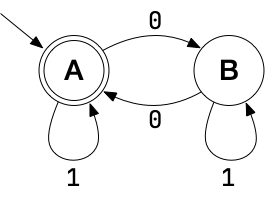

In [8]:
Q = {'A', 'B'}
Sigma = {'0', '1'}
delta = {'A': {'0': 'B',
               '1': 'A'},
         'B': {'0': 'A',
               '1': 'B'}}
q_0 = 'A'
F = {'A'}
M = Dfa(Q, Sigma, delta, q_0, F)  # instantiate the DFA

#### Tests for DFA recognizing bitstrings with even number of 0s

In [9]:
tests = [('', True),    # Remember: 0 is even!
         ('0', False),
         ('00', True),
         ('100', True),
         ('101', False),
         ('01010101', True),
         ('010101010', False)]

print()
print("L_1 = {w | w contains an even number of 0s}")
run_tests(M, tests)


L_1 = {w | w contains an even number of 0s}
Reported: True. Correct! '' is in the language of M.
Reported: False. Correct! '0' is not in the language of M.
Reported: True. Correct! '00' is in the language of M.
Reported: True. Correct! '100' is in the language of M.
Reported: False. Correct! '101' is not in the language of M.
Reported: True. Correct! '01010101' is in the language of M.
Reported: False. Correct! '010101010' is not in the language of M.


### Example 2: DFA to recognize all bitstrings containing 101 as substring.

$L_2 = \{w \: | \: w \text{ contains \texttt{101} as a substring}\}$

Here's a diagram:

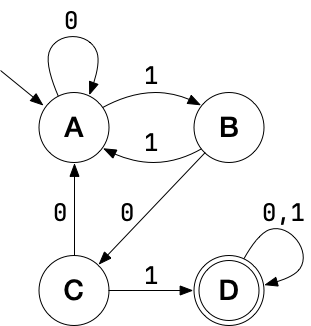

In [10]:
Q = {'A', 'B', 'C', 'D'}
Sigma = {'0', '1'}
delta = {'A': {'0': 'A',
               '1': 'B'},
         'B': {'0': 'C',
               '1': 'A'},
         'C': {'0': 'A',
               '1': 'D'},
         'D': {'0': 'D',
               '1': 'D'}}
q_0 = 'A'
F = {'D'}
M = Dfa(Q, Sigma, delta, q_0, F)  # instantiate the DFA

#### Tests for DFA recognizing bitstrings with 101 as substring.

In [11]:
tests = [('', False),
         ('0', False),
         ('00', False),
         ('100', False),
         ('101', True),
         ('01010101', True),
         ('000101000', True),
         ('1000101', True),
         ('1001001', False)]

print()
print("L_2 = {w | w contains 101 as substring}")
run_tests(M, tests)


L_2 = {w | w contains 101 as substring}
Reported: False. Correct! '' is not in the language of M.
Reported: False. Correct! '0' is not in the language of M.
Reported: False. Correct! '00' is not in the language of M.
Reported: False. Correct! '100' is not in the language of M.
Reported: True. Correct! '101' is in the language of M.
Reported: True. Correct! '01010101' is in the language of M.
Reported: True. Correct! '000101000' is in the language of M.
Reported: True. Correct! '1000101' is in the language of M.
Reported: False. Correct! '1001001' is not in the language of M.


### COMPLETE THIS SECTION

Now define your own DFA to recognize the language of all bitstrings that start and end with the same symbol here. 

$L_3 = \{w \: | \: w \text{ begins and ends with the same symbol}\}$

Replace the `None`s below to complete the definition

In [16]:
Q = {'A', 'B', 'C', 'D', 'E'}
Sigma = {'0', '1'}
delta = {'A':{'0': 'B',
              '1': 'D'},
         'B':{'0': 'B',
              '1': 'C'},
         'C':{'0': 'B',
              '1': 'C'},
         'D':{'0': 'E',
              '1': 'D'},
         'E':{'0': 'E',
              '1': 'D'}}
q_0 = 'A'
F = {'A', 'B', 'D'}
M = Dfa(Q, Sigma, delta, q_0, F)   # instantiate the DFA
T_3 = (Q, Sigma, delta, q_0, F)    # leave this line untouched! (reserved for grading)

#### Tests for DFA recognizing all bitstrings that begin and end with the same symbol

Make sure the machine you define (above) passes all these tests!

In [17]:
tests = [('', True),
         ('0', True),
         ('00', True),
         ('100', False),
         ('101', True),
         ('01010101', False),
         ('10', False),
         ('1000101', True),
         ('0001001', False),
         ('1', True),
         ('11', True)]

print()
print("L_3 = {w | w begins and ends with the same symbol.}")
run_tests(M, tests)


L_3 = {w | w begins and ends with the same symbol.}
Reported: True. Correct! '' is in the language of M.
Reported: True. Correct! '0' is in the language of M.
Reported: True. Correct! '00' is in the language of M.
Reported: False. Correct! '100' is not in the language of M.
Reported: True. Correct! '101' is in the language of M.
Reported: False. Correct! '01010101' is not in the language of M.
Reported: False. Correct! '10' is not in the language of M.
Reported: True. Correct! '1000101' is in the language of M.
Reported: False. Correct! '0001001' is not in the language of M.
Reported: True. Correct! '1' is in the language of M.
Reported: True. Correct! '11' is in the language of M.


### COMPLETE THIS SECTION

Now define your own DFA to recognize the language of all strings over the alphabet $\Sigma = \{\text{\texttt{a}}, \text{\texttt{b}}\}$ such that its language is:

$L_4 = \{w \: | \: w \text{ contains either \texttt{ab} or \texttt{ba} as a substring}\}$

Replace the `None`s below to complete the definition

In [18]:
Q = {'A', 'B', 'C', 'D', 'E'}
Sigma = {'a', 'b'}
delta = {'A' : {'a' : 'B',
                'b' : 'D'},
         'B' : {'a' : 'B',
                'b' : 'C'},
         'C' : {'a' : 'C',
                'b' : 'C'},
         'D' : {'a' : 'E',
                'b' : 'D'},
         'E' : {'a' : 'E',
                'b' : 'E'}}
q_0 = 'A'
F = {'C', 'E'}
M = Dfa(Q, Sigma, delta, q_0, F)   # instantiate the DFA
T_4 = (Q, Sigma, delta, q_0, F)    # leave this line untouched! (reserved for grading)

#### Tests

Make sure the machine you define (above) passes all these tests!

In [19]:
tests = [('', False),
         ('a', False),
         ('b', False),
         ('aa', False),
         ('bb', False),
         ('ab', True),
         ('ba', True),
         ('aaab', True),
         ('bbba', True)]

print()
print("L_4 = {w | w contains ab or ba as substring.}")
run_tests(M, tests)


L_4 = {w | w contains ab or ba as substring.}
Reported: False. Correct! '' is not in the language of M.
Reported: False. Correct! 'a' is not in the language of M.
Reported: False. Correct! 'b' is not in the language of M.
Reported: False. Correct! 'aa' is not in the language of M.
Reported: False. Correct! 'bb' is not in the language of M.
Reported: True. Correct! 'ab' is in the language of M.
Reported: True. Correct! 'ba' is in the language of M.
Reported: True. Correct! 'aaab' is in the language of M.
Reported: True. Correct! 'bbba' is in the language of M.


### Addendum

This is here for the curious, or those who want to deepen or test their understanding of our first proof of closure of regular languages under union.

DFA to recognize $L_1 \cup L_3$, where $L_1 = \{w \: | \: w \text{ contains an even number of \texttt{0}s}\}$ and $L_3 = \{w \: | \: w \text{ begins and ends with the same symbol}\}$, over the binary alphabet (as above). This uses the technique applied by Sipser in his proof of Theorem 1.25 (The class of regular languages is closed under the union operation).  

In [20]:
Q = {'(A, C)', '(A, D)', '(A, E)', '(A, G)', '(A, H)',
     '(B, C)', '(B, D)', '(B, E)', '(B, G)', '(B, H)'}
Sigma = {'0', '1'}
delta = {'(A, C)': {'0': '(B, D)',
                    '1': '(A, G)'},
         '(A, D)': {'0': '(B, D)',
                    '1': '(A, E)'},
         '(A, E)': {'0': '(B, D)',
                    '1': '(A, E)'},
         '(A, G)': {'0': '(B, H)',
                    '1': '(A, G)'},
         '(A, H)': {'0': '(B, H)',
                    '1': '(A, G)'},
         '(B, C)': {'0': '(A, D)',
                    '1': '(B, G)'},
         '(B, D)': {'0': '(A, D)',
                    '1': '(B, E)'},
         '(B, E)': {'0': '(A, D)',
                    '1': '(B, E)'},
         '(B, G)': {'0': '(A, H)',
                    '1': '(B, G)'},
         '(B, H)': {'0': '(A, H)',
                    '1': '(B, G)'}}
q_0 = '(A, C)'
F = {'(A, C)', '(A, D)', '(A, E)', '(A, G)', '(A, H)', 
     '(B, C)', '(B, D)', '(B, G)'}
M = Dfa(Q, Sigma, delta, q_0, F)

tests = [('', True),          # in both languages
         ('0', True),         # begins and ends with same symbol
         ('00', True),        # in both languages
         ('100', True),       # even number of zeros
         ('1000', False),     # nope
         ('101', True),       # begins and ends with same symbol
         ('01010101', True),  # even number of zeros
         ('101010', False),   # nope
         ('1000101', True),   # in both languages
         ('0001001', False),  # nope
         ('1', True),         # in both languages
         ('11', True),        # in both languages
         ('110', False)]      # nope

print()
print("L_5 = L_1 U L_3 = {w | w begins and ends with the same symbol or has an even number of zeros.}")
run_tests(M, tests)



L_5 = L_1 U L_3 = {w | w begins and ends with the same symbol or has an even number of zeros.}
Reported: True. Correct! '' is in the language of M.
Reported: True. Correct! '0' is in the language of M.
Reported: True. Correct! '00' is in the language of M.
Reported: True. Correct! '100' is in the language of M.
Reported: False. Correct! '1000' is not in the language of M.
Reported: True. Correct! '101' is in the language of M.
Reported: True. Correct! '01010101' is in the language of M.
Reported: False. Correct! '101010' is not in the language of M.
Reported: True. Correct! '1000101' is in the language of M.
Reported: False. Correct! '0001001' is not in the language of M.
Reported: True. Correct! '1' is in the language of M.
Reported: True. Correct! '11' is in the language of M.
Reported: False. Correct! '110' is not in the language of M.
